<a href="https://colab.research.google.com/github/meher-chinmaya/Practice-DL/blob/main/MLP_Model_Tensorflow2_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MLP Initialization

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, Model, initializers
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST Data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and Flatten
x_train = x_train.reshape(-1, 784).astype('float32') / 255.
x_test = x_test.reshape(-1, 784).astype('float32') / 255.
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# Parameters
n_hidden_1 = 512
n_hidden_2 = 128
n_input = 784
n_classes = 10
training_epochs = 8
learning_rate = 0.001
batch_size = 100

# Plotting Function
def plt_dynamic(x, y, y_1, ax, ticks, title, colors=['b']):
    ax.clear()
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    plt.legend()
    plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Model 1
*   input (784)
*   sigmoid(512)
*   sigmoid(128)
*   softmax(output 10)

In [3]:
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1).
# h1 =>  σ=√(2/(fan_in+fan_out+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(fan_in+fan_out+1) = 0.055  => N(0,σ) = N(0,0.055)
# out =>  σ=√(2/(fan_in+fan_out+1) = 0.120  => N(0,σ) = N(0,0.120)
# SGD: Xavier/Glorot Normal initialization.
# Manual way : kernel_initializer=tf.random_normal_initializer(mean=0., stddev=0.039)

# Define the Model
class MLP(Model):
    def __init__(self):
        super(MLP, self).__init__()

        glorot_init = initializers.GlorotNormal()

        self.fc1 = layers.Dense(n_hidden_1, activation='sigmoid', kernel_initializer=glorot_init)
        self.fc2 = layers.Dense(n_hidden_2, activation='sigmoid', kernel_initializer=glorot_init)
        self.out = layers.Dense(n_classes, activation='softmax', kernel_initializer=glorot_init)

    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        return x

model = MLP()

# Optimizer and Loss
loss_object = losses.CategoricalCrossentropy(from_logits=False)
optimizer = optimizers.Adam(learning_rate=learning_rate)

### Model 1 + Adam Optimiser

Epoch 0: Train Loss: 0.5039, Test Loss: 0.2407, Train Accuracy: 0.8656, Test Accuracy: 0.9296
Epoch 1: Train Loss: 0.2101, Test Loss: 0.1724, Train Accuracy: 0.9377, Test Accuracy: 0.9486
Epoch 2: Train Loss: 0.1517, Test Loss: 0.1344, Train Accuracy: 0.9553, Test Accuracy: 0.9588
Epoch 3: Train Loss: 0.1147, Test Loss: 0.1062, Train Accuracy: 0.9661, Test Accuracy: 0.9676
Epoch 4: Train Loss: 0.0871, Test Loss: 0.0935, Train Accuracy: 0.9743, Test Accuracy: 0.9718
Epoch 5: Train Loss: 0.0685, Test Loss: 0.0977, Train Accuracy: 0.9796, Test Accuracy: 0.9685
Epoch 6: Train Loss: 0.0547, Test Loss: 0.0791, Train Accuracy: 0.9832, Test Accuracy: 0.9750
Epoch 7: Train Loss: 0.0428, Test Loss: 0.0755, Train Accuracy: 0.9869, Test Accuracy: 0.9777


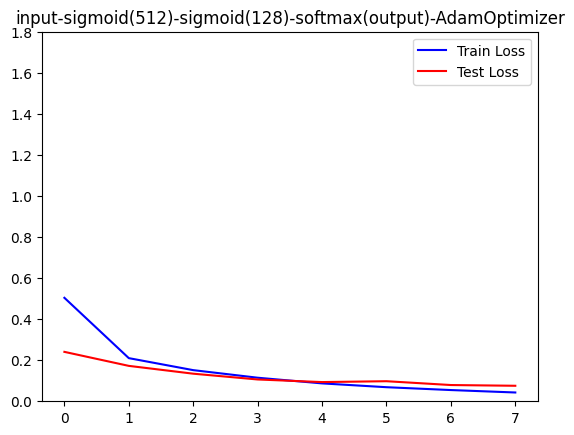

In [4]:
# Training Loop
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(60000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

train_loss_results = []
test_loss_results = []
epochs = []

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')


for epoch in range(training_epochs):
    train_loss = tf.metrics.Mean()
    test_loss = tf.metrics.Mean()
    train_accuracy = tf.metrics.CategoricalAccuracy()
    test_accuracy = tf.metrics.CategoricalAccuracy()

    # Training loop
    for images, labels in train_dataset:
        with tf.GradientTape() as tape:
            predictions = model(images)
            loss = loss_object(labels, predictions)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        train_loss.update_state(loss)
        train_accuracy.update_state(labels, predictions)

    # Testing loop
    for test_images, test_labels in test_dataset:
        test_predictions = model(test_images)
        t_loss = loss_object(test_labels, test_predictions)
        test_loss.update_state(t_loss)
        test_accuracy.update_state(test_labels, test_predictions)

    train_acc = train_accuracy.result().numpy()
    test_acc = test_accuracy.result().numpy()

    # Record loss
    train_loss_results.append(train_loss.result())
    test_loss_results.append(test_loss.result())
    epochs.append(epoch)

    if epoch % 1 == 0:
        print(f"Epoch {epoch}: Train Loss: {train_loss.result():.4f}, Test Loss: {test_loss.result():.4f}, "
            f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

    ticks = np.arange(0, 2, step=0.2)
    plt_dynamic(epochs, train_loss_results, test_loss_results, ax, ticks, title="input-sigmoid(512)-sigmoid(128)-softmax(output)-AdamOptimizer")

plt.show()

### Model 1 + SGD Optimiser

In [5]:
# Optimizer
optimizer = optimizers.SGD(learning_rate=learning_rate)

Epoch 0: Train Loss: 0.0342, Test Loss: 0.0734, Train Accuracy: 0.9903, Test Accuracy: 0.9779
Epoch 1: Train Loss: 0.0327, Test Loss: 0.0719, Train Accuracy: 0.9910, Test Accuracy: 0.9781
Epoch 2: Train Loss: 0.0317, Test Loss: 0.0709, Train Accuracy: 0.9915, Test Accuracy: 0.9781
Epoch 3: Train Loss: 0.0309, Test Loss: 0.0701, Train Accuracy: 0.9919, Test Accuracy: 0.9785
Epoch 4: Train Loss: 0.0304, Test Loss: 0.0695, Train Accuracy: 0.9922, Test Accuracy: 0.9784
Epoch 5: Train Loss: 0.0300, Test Loss: 0.0691, Train Accuracy: 0.9924, Test Accuracy: 0.9784
Epoch 6: Train Loss: 0.0297, Test Loss: 0.0687, Train Accuracy: 0.9924, Test Accuracy: 0.9783
Epoch 7: Train Loss: 0.0294, Test Loss: 0.0684, Train Accuracy: 0.9926, Test Accuracy: 0.9780


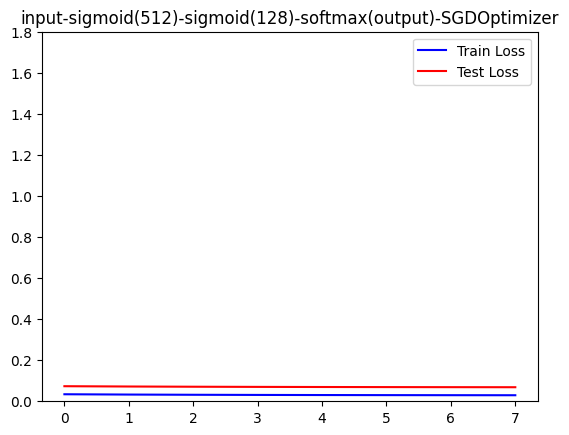

In [6]:
# Training Loop
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(60000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

train_loss_results = []
test_loss_results = []
epochs = []

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')


for epoch in range(training_epochs):
    train_loss = tf.metrics.Mean()
    test_loss = tf.metrics.Mean()
    train_accuracy = tf.metrics.CategoricalAccuracy()
    test_accuracy = tf.metrics.CategoricalAccuracy()

    # Training loop
    for images, labels in train_dataset:
        with tf.GradientTape() as tape:
            predictions = model(images)
            loss = loss_object(labels, predictions)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        train_loss.update_state(loss)
        train_accuracy.update_state(labels, predictions)

    # Testing loop
    for test_images, test_labels in test_dataset:
        test_predictions = model(test_images)
        t_loss = loss_object(test_labels, test_predictions)
        test_loss.update_state(t_loss)
        test_accuracy.update_state(test_labels, test_predictions)

    train_acc = train_accuracy.result().numpy()
    test_acc = test_accuracy.result().numpy()

    # Record loss
    train_loss_results.append(train_loss.result())
    test_loss_results.append(test_loss.result())
    epochs.append(epoch)

    if epoch % 1 == 0:
        print(f"Epoch {epoch}: Train Loss: {train_loss.result():.4f}, Test Loss: {test_loss.result():.4f}, "
            f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

    ticks = np.arange(0, 2, step=0.2)
    plt_dynamic(epochs, train_loss_results, test_loss_results, ax, ticks, title="input-sigmoid(512)-sigmoid(128)-softmax(output)-SGDOptimizer")

plt.show()

### Model 2
*   input (784)
*   Relu(512)
*   Relu(128)
*   softmax(output 10)

In [7]:
# Model Definition
class MLP_ReLU(Model):
    def __init__(self):
        super(MLP_ReLU, self).__init__()

        # He Initialization is better for ReLU
        he_init = initializers.HeNormal()

        self.fc1 = layers.Dense(n_hidden_1, activation='relu', kernel_initializer=he_init)
        self.fc2 = layers.Dense(n_hidden_2, activation='relu', kernel_initializer=he_init)
        self.out = layers.Dense(n_classes, activation='softmax', kernel_initializer=he_init)

    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        return x

# Create Model
model = MLP_ReLU()

### Model 2 + Adam

Epoch 0: Train Loss: 0.2189, Test Loss: 0.1071, Train Accuracy: 0.9359, Test Accuracy: 0.9649
Epoch 1: Train Loss: 0.0823, Test Loss: 0.0778, Train Accuracy: 0.9752, Test Accuracy: 0.9760
Epoch 2: Train Loss: 0.0524, Test Loss: 0.0668, Train Accuracy: 0.9835, Test Accuracy: 0.9783
Epoch 3: Train Loss: 0.0357, Test Loss: 0.0736, Train Accuracy: 0.9885, Test Accuracy: 0.9772
Epoch 4: Train Loss: 0.0282, Test Loss: 0.0691, Train Accuracy: 0.9909, Test Accuracy: 0.9784
Epoch 5: Train Loss: 0.0214, Test Loss: 0.0676, Train Accuracy: 0.9930, Test Accuracy: 0.9800
Epoch 6: Train Loss: 0.0169, Test Loss: 0.0768, Train Accuracy: 0.9945, Test Accuracy: 0.9779
Epoch 7: Train Loss: 0.0163, Test Loss: 0.0681, Train Accuracy: 0.9942, Test Accuracy: 0.9826


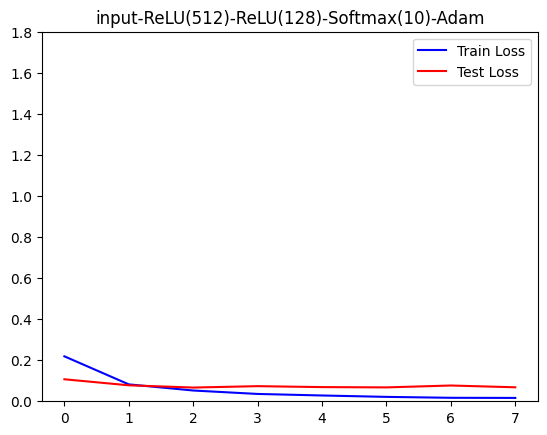

In [8]:
# Optimizer and Loss
loss_object = losses.CategoricalCrossentropy(from_logits=False)
optimizer_adam = optimizers.Adam(learning_rate=learning_rate)

# Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(60000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

# Tracking
train_loss_results = []
test_loss_results = []
epochs = []

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')


for epoch in range(training_epochs):
    train_loss = tf.metrics.Mean()
    test_loss = tf.metrics.Mean()
    train_accuracy = tf.metrics.CategoricalAccuracy()
    test_accuracy = tf.metrics.CategoricalAccuracy()

    # Training loop
    for images, labels in train_dataset:
        with tf.GradientTape() as tape:
            predictions = model(images)
            loss = loss_object(labels, predictions)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer_adam.apply_gradients(zip(grads, model.trainable_variables))
        train_loss.update_state(loss)
        train_accuracy.update_state(labels, predictions)

    # Testing loop
    for test_images, test_labels in test_dataset:
        test_predictions = model(test_images)
        t_loss = loss_object(test_labels, test_predictions)
        test_loss.update_state(t_loss)
        test_accuracy.update_state(test_labels, test_predictions)

    train_acc = train_accuracy.result().numpy()
    test_acc = test_accuracy.result().numpy()

    # Record loos
    train_loss_results.append(train_loss.result())
    test_loss_results.append(test_loss.result())
    epochs.append(epoch)

    if epoch % 1 == 0:
        print(f"Epoch {epoch}: Train Loss: {train_loss.result():.4f}, Test Loss: {test_loss.result():.4f}, "
              f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

    ticks = np.arange(0, 2, step=0.2)
    plt_dynamic(epochs, train_loss_results, test_loss_results, ax, ticks,
                title="input-ReLU(512)-ReLU(128)-Softmax(10)-Adam")

plt.show()

### Model 2 + SGD

Epoch 0: Train Loss: 0.0080, Test Loss: 0.0674, Train Accuracy: 0.9974, Test Accuracy: 0.9827
Epoch 1: Train Loss: 0.0075, Test Loss: 0.0669, Train Accuracy: 0.9976, Test Accuracy: 0.9827
Epoch 2: Train Loss: 0.0071, Test Loss: 0.0665, Train Accuracy: 0.9978, Test Accuracy: 0.9827
Epoch 3: Train Loss: 0.0067, Test Loss: 0.0661, Train Accuracy: 0.9979, Test Accuracy: 0.9826
Epoch 4: Train Loss: 0.0065, Test Loss: 0.0658, Train Accuracy: 0.9981, Test Accuracy: 0.9829
Epoch 5: Train Loss: 0.0062, Test Loss: 0.0656, Train Accuracy: 0.9982, Test Accuracy: 0.9830
Epoch 6: Train Loss: 0.0060, Test Loss: 0.0653, Train Accuracy: 0.9983, Test Accuracy: 0.9828
Epoch 7: Train Loss: 0.0058, Test Loss: 0.0651, Train Accuracy: 0.9983, Test Accuracy: 0.9829


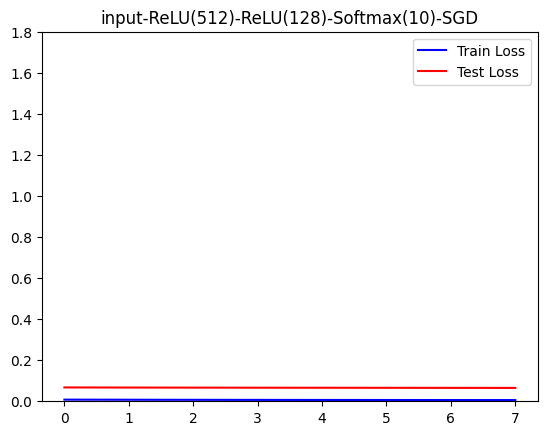

In [9]:
# Optimizer and Loss
loss_object = losses.CategoricalCrossentropy(from_logits=False)
optimizer_sgd = optimizers.SGD(learning_rate=learning_rate)

# Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(60000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

# Tracking
train_loss_results = []
test_loss_results = []
epochs = []

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')


for epoch in range(training_epochs):
    train_loss = tf.metrics.Mean()
    test_loss = tf.metrics.Mean()
    train_accuracy = tf.metrics.CategoricalAccuracy()
    test_accuracy = tf.metrics.CategoricalAccuracy()

    # Training loop
    for images, labels in train_dataset:
        with tf.GradientTape() as tape:
            predictions = model(images)
            loss = loss_object(labels, predictions)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer_sgd.apply_gradients(zip(grads, model.trainable_variables))
        train_loss.update_state(loss)
        train_accuracy.update_state(labels, predictions)

    # Testing loop
    for test_images, test_labels in test_dataset:
        test_predictions = model(test_images)
        t_loss = loss_object(test_labels, test_predictions)
        test_loss.update_state(t_loss)
        test_accuracy.update_state(test_labels, test_predictions)

    train_acc = train_accuracy.result().numpy()
    test_acc = test_accuracy.result().numpy()

    # Record loos
    train_loss_results.append(train_loss.result())
    test_loss_results.append(test_loss.result())
    epochs.append(epoch)

    if epoch % 1 == 0:
        print(f"Epoch {epoch}: Train Loss: {train_loss.result():.4f}, Test Loss: {test_loss.result():.4f}, "
              f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

    ticks = np.arange(0, 2, step=0.2)
    plt_dynamic(epochs, train_loss_results, test_loss_results, ax, ticks,
                title="input-ReLU(512)-ReLU(128)-Softmax(10)-SGD")

plt.show()

### Model 3
*   input (784)
*   sigmoid- BatchNorm(512)
*   sigmoid- BatchNorm(128)
*   softmax(output 10)

In [10]:
# Model Definition
class MLP_Sigmoid_BN(Model):
    def __init__(self):
        super(MLP_Sigmoid_BN, self).__init__()

        glorot_init = initializers.GlorotUniform()

        self.fc1 = layers.Dense(n_hidden_1, kernel_initializer=glorot_init)
        self.bn1 = layers.BatchNormalization()
        self.act1 = layers.Activation('sigmoid')

        self.fc2 = layers.Dense(n_hidden_2, kernel_initializer=glorot_init)
        self.bn2 = layers.BatchNormalization()
        self.act2 = layers.Activation('sigmoid')

        self.out = layers.Dense(n_classes, activation='softmax', kernel_initializer=glorot_init)

    def call(self, x, training=False):
        x = self.fc1(x)
        x = self.bn1(x, training=training)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.bn2(x, training=training)
        x = self.act2(x)

        x = self.out(x)
        return x

# Create Model
model = MLP_Sigmoid_BN()

### Model 3 + Adam

Epoch 0: Train Loss: 0.4569, Test Loss: 0.2619, Train Accuracy: 0.8942, Test Accuracy: 0.9274
Epoch 1: Train Loss: 0.2234, Test Loss: 0.1808, Train Accuracy: 0.9380, Test Accuracy: 0.9492
Epoch 2: Train Loss: 0.1449, Test Loss: 0.1323, Train Accuracy: 0.9574, Test Accuracy: 0.9590
Epoch 3: Train Loss: 0.1052, Test Loss: 0.1107, Train Accuracy: 0.9692, Test Accuracy: 0.9658
Epoch 4: Train Loss: 0.0829, Test Loss: 0.1068, Train Accuracy: 0.9739, Test Accuracy: 0.9695
Epoch 5: Train Loss: 0.0666, Test Loss: 0.0841, Train Accuracy: 0.9803, Test Accuracy: 0.9738
Epoch 6: Train Loss: 0.0537, Test Loss: 0.0896, Train Accuracy: 0.9836, Test Accuracy: 0.9719
Epoch 7: Train Loss: 0.0458, Test Loss: 0.0770, Train Accuracy: 0.9855, Test Accuracy: 0.9752


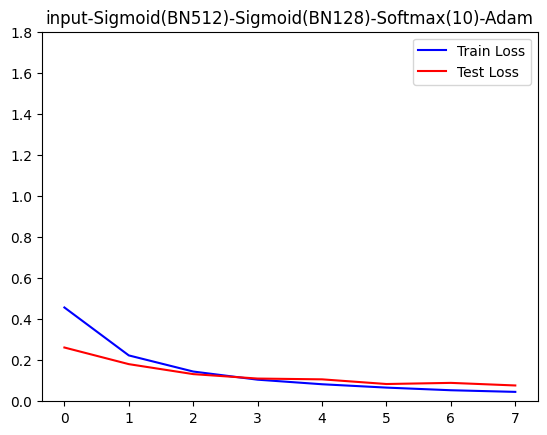

In [11]:
# Optimizer and Loss
loss_object = losses.CategoricalCrossentropy(from_logits=False)
optimizer_adam = optimizers.Adam(learning_rate=learning_rate)

# Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(60000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

# Tracking
train_loss_results = []
test_loss_results = []
epochs = []

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Training Loop
for epoch in range(training_epochs):
    train_loss = tf.metrics.Mean()
    test_loss = tf.metrics.Mean()
    train_accuracy = tf.metrics.CategoricalAccuracy()
    test_accuracy = tf.metrics.CategoricalAccuracy()

    for images, labels in train_dataset:
        with tf.GradientTape() as tape:
            predictions = model(images, training=True)
            loss = loss_object(labels, predictions)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer_adam.apply_gradients(zip(grads, model.trainable_variables))
        train_loss.update_state(loss)
        train_accuracy.update_state(labels, predictions)

    for test_images, test_labels in test_dataset:
        test_predictions = model(test_images, training=False)
        t_loss = loss_object(test_labels, test_predictions)
        test_loss.update_state(t_loss)
        test_accuracy.update_state(test_labels, test_predictions)

    train_acc = train_accuracy.result().numpy()
    test_acc = test_accuracy.result().numpy()

    train_loss_results.append(train_loss.result())
    test_loss_results.append(test_loss.result())
    epochs.append(epoch)

    if epoch % 1 == 0:
        print(f"Epoch {epoch}: Train Loss: {train_loss.result():.4f}, Test Loss: {test_loss.result():.4f}, "
              f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

    ticks = np.arange(0, 2, step=0.2)
    plt_dynamic(epochs, train_loss_results, test_loss_results, ax, ticks,
                title="input-Sigmoid(BN512)-Sigmoid(BN128)-Softmax(10)-Adam")

plt.show()

### Model 3 + SGD

Epoch 0: Train Loss: 0.0338, Test Loss: 0.0700, Train Accuracy: 0.9896, Test Accuracy: 0.9791
Epoch 1: Train Loss: 0.0322, Test Loss: 0.0686, Train Accuracy: 0.9905, Test Accuracy: 0.9792
Epoch 2: Train Loss: 0.0313, Test Loss: 0.0678, Train Accuracy: 0.9908, Test Accuracy: 0.9793
Epoch 3: Train Loss: 0.0309, Test Loss: 0.0668, Train Accuracy: 0.9909, Test Accuracy: 0.9792
Epoch 4: Train Loss: 0.0298, Test Loss: 0.0661, Train Accuracy: 0.9916, Test Accuracy: 0.9802
Epoch 5: Train Loss: 0.0293, Test Loss: 0.0652, Train Accuracy: 0.9919, Test Accuracy: 0.9804
Epoch 6: Train Loss: 0.0292, Test Loss: 0.0646, Train Accuracy: 0.9917, Test Accuracy: 0.9807
Epoch 7: Train Loss: 0.0274, Test Loss: 0.0641, Train Accuracy: 0.9923, Test Accuracy: 0.9804


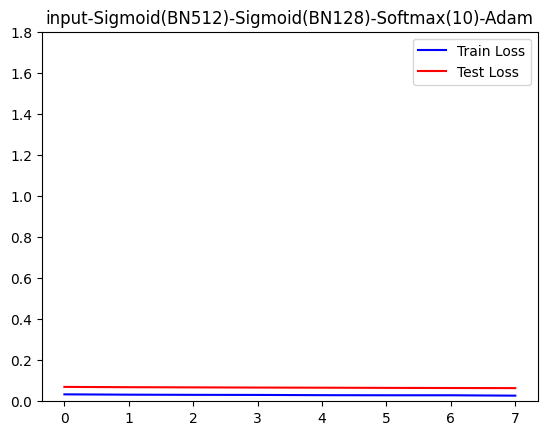

In [12]:
# Optimizer and Loss
loss_object = losses.CategoricalCrossentropy(from_logits=False)
optimizer_sgd = optimizers.SGD(learning_rate=learning_rate)

# Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(60000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

# Tracking
train_loss_results = []
test_loss_results = []
epochs = []

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Training Loop
for epoch in range(training_epochs):
    train_loss = tf.metrics.Mean()
    test_loss = tf.metrics.Mean()
    train_accuracy = tf.metrics.CategoricalAccuracy()
    test_accuracy = tf.metrics.CategoricalAccuracy()

    for images, labels in train_dataset:
        with tf.GradientTape() as tape:
            predictions = model(images, training=True)
            loss = loss_object(labels, predictions)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer_sgd.apply_gradients(zip(grads, model.trainable_variables))
        train_loss.update_state(loss)
        train_accuracy.update_state(labels, predictions)

    for test_images, test_labels in test_dataset:
        test_predictions = model(test_images, training=False)
        t_loss = loss_object(test_labels, test_predictions)
        test_loss.update_state(t_loss)
        test_accuracy.update_state(test_labels, test_predictions)

    train_acc = train_accuracy.result().numpy()
    test_acc = test_accuracy.result().numpy()

    train_loss_results.append(train_loss.result())
    test_loss_results.append(test_loss.result())
    epochs.append(epoch)

    if epoch % 1 == 0:
        print(f"Epoch {epoch}: Train Loss: {train_loss.result():.4f}, Test Loss: {test_loss.result():.4f}, "
              f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

    ticks = np.arange(0, 2, step=0.2)
    plt_dynamic(epochs, train_loss_results, test_loss_results, ax, ticks,
                title="input-Sigmoid(BN512)-Sigmoid(BN128)-Softmax(10)-Adam")

plt.show()

### Model 4
*   input (784)
*   Relu - DropOut(512)
*   Relu - DropOut(128)
*   softmax(output 10)

In [14]:
dropout_rate = 0.5

# Define Model 4
class MLP_ReLU_DO(tf.keras.Model):
    def __init__(self):
        super(MLP_ReLU_DO, self).__init__()

        glorot_init = initializers.GlorotNormal()

        self.fc1 = layers.Dense(n_hidden_1, activation=None, kernel_initializer=glorot_init)
        self.act1 = layers.Activation('relu')
        self.dropout1 = layers.Dropout(dropout_rate)

        self.fc2 = layers.Dense(n_hidden_2, activation=None, kernel_initializer=glorot_init)
        self.act2 = layers.Activation('relu')
        self.dropout2 = layers.Dropout(dropout_rate)

        self.out = layers.Dense(n_classes, activation='softmax', kernel_initializer=glorot_init)

    def call(self, x, training=False):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.dropout1(x, training=training)

        x = self.fc2(x)
        x = self.act2(x)
        x = self.dropout2(x, training=training)

        x = self.out(x)
        return x

# Instantiate the Model
model = MLP_ReLU_DO()

### Model 4 + Adam

Epoch 0: Train Loss: 0.4259, Test Loss: 0.1436, Train Accuracy: 0.8691, Test Accuracy: 0.9561
Epoch 1: Train Loss: 0.1969, Test Loss: 0.1029, Train Accuracy: 0.9431, Test Accuracy: 0.9693
Epoch 2: Train Loss: 0.1541, Test Loss: 0.0894, Train Accuracy: 0.9556, Test Accuracy: 0.9730
Epoch 3: Train Loss: 0.1326, Test Loss: 0.0839, Train Accuracy: 0.9612, Test Accuracy: 0.9738
Epoch 4: Train Loss: 0.1170, Test Loss: 0.0742, Train Accuracy: 0.9653, Test Accuracy: 0.9777
Epoch 5: Train Loss: 0.1039, Test Loss: 0.0779, Train Accuracy: 0.9685, Test Accuracy: 0.9769
Epoch 6: Train Loss: 0.0979, Test Loss: 0.0718, Train Accuracy: 0.9704, Test Accuracy: 0.9792
Epoch 7: Train Loss: 0.0895, Test Loss: 0.0695, Train Accuracy: 0.9731, Test Accuracy: 0.9803


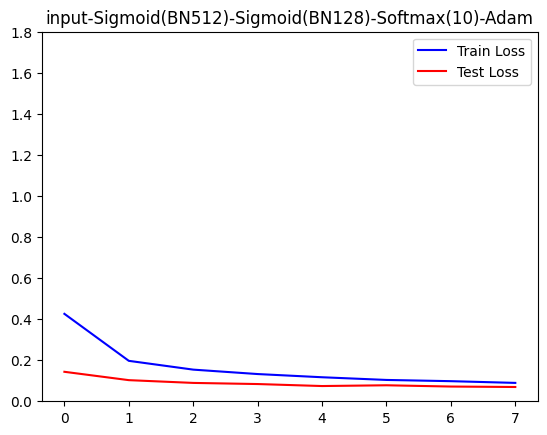

In [15]:
# Optimizer and Loss
loss_object = losses.CategoricalCrossentropy(from_logits=False)
optimizer_adam = optimizers.Adam(learning_rate=learning_rate)

# Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(60000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

# Tracking
train_loss_results = []
test_loss_results = []
epochs = []

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Training Loop
for epoch in range(training_epochs):
    train_loss = tf.metrics.Mean()
    test_loss = tf.metrics.Mean()
    train_accuracy = tf.metrics.CategoricalAccuracy()
    test_accuracy = tf.metrics.CategoricalAccuracy()

    for images, labels in train_dataset:
        with tf.GradientTape() as tape:
            predictions = model(images, training=True)
            loss = loss_object(labels, predictions)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer_adam.apply_gradients(zip(grads, model.trainable_variables))
        train_loss.update_state(loss)
        train_accuracy.update_state(labels, predictions)

    for test_images, test_labels in test_dataset:
        test_predictions = model(test_images, training=False)
        t_loss = loss_object(test_labels, test_predictions)
        test_loss.update_state(t_loss)
        test_accuracy.update_state(test_labels, test_predictions)

    train_acc = train_accuracy.result().numpy()
    test_acc = test_accuracy.result().numpy()

    train_loss_results.append(train_loss.result())
    test_loss_results.append(test_loss.result())
    epochs.append(epoch)

    if epoch % 1 == 0:
        print(f"Epoch {epoch}: Train Loss: {train_loss.result():.4f}, Test Loss: {test_loss.result():.4f}, "
              f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

    ticks = np.arange(0, 2, step=0.2)
    plt_dynamic(epochs, train_loss_results, test_loss_results, ax, ticks,
                title="input-Sigmoid(BN512)-Sigmoid(BN128)-Softmax(10)-Adam")

plt.show()

### Model 4 + SGD

Epoch 0: Train Loss: 0.0781, Test Loss: 0.0685, Train Accuracy: 0.9753, Test Accuracy: 0.9805
Epoch 1: Train Loss: 0.0772, Test Loss: 0.0678, Train Accuracy: 0.9766, Test Accuracy: 0.9808
Epoch 2: Train Loss: 0.0769, Test Loss: 0.0673, Train Accuracy: 0.9765, Test Accuracy: 0.9810
Epoch 3: Train Loss: 0.0751, Test Loss: 0.0669, Train Accuracy: 0.9772, Test Accuracy: 0.9812
Epoch 4: Train Loss: 0.0750, Test Loss: 0.0666, Train Accuracy: 0.9779, Test Accuracy: 0.9816
Epoch 5: Train Loss: 0.0743, Test Loss: 0.0662, Train Accuracy: 0.9775, Test Accuracy: 0.9816
Epoch 6: Train Loss: 0.0750, Test Loss: 0.0659, Train Accuracy: 0.9772, Test Accuracy: 0.9817
Epoch 7: Train Loss: 0.0734, Test Loss: 0.0657, Train Accuracy: 0.9775, Test Accuracy: 0.9816


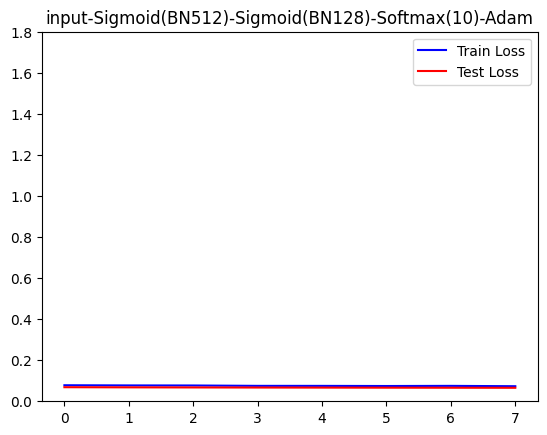

In [16]:
# Optimizer and Loss
loss_object = losses.CategoricalCrossentropy(from_logits=False)
optimizer_sgd = optimizers.SGD(learning_rate=learning_rate)

# Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(60000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

# Tracking
train_loss_results = []
test_loss_results = []
epochs = []

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Training Loop
for epoch in range(training_epochs):
    train_loss = tf.metrics.Mean()
    test_loss = tf.metrics.Mean()
    train_accuracy = tf.metrics.CategoricalAccuracy()
    test_accuracy = tf.metrics.CategoricalAccuracy()

    for images, labels in train_dataset:
        with tf.GradientTape() as tape:
            predictions = model(images, training=True)
            loss = loss_object(labels, predictions)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer_sgd.apply_gradients(zip(grads, model.trainable_variables))
        train_loss.update_state(loss)
        train_accuracy.update_state(labels, predictions)

    for test_images, test_labels in test_dataset:
        test_predictions = model(test_images, training=False)
        t_loss = loss_object(test_labels, test_predictions)
        test_loss.update_state(t_loss)
        test_accuracy.update_state(test_labels, test_predictions)

    train_acc = train_accuracy.result().numpy()
    test_acc = test_accuracy.result().numpy()

    train_loss_results.append(train_loss.result())
    test_loss_results.append(test_loss.result())
    epochs.append(epoch)

    if epoch % 1 == 0:
        print(f"Epoch {epoch}: Train Loss: {train_loss.result():.4f}, Test Loss: {test_loss.result():.4f}, "
              f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

    ticks = np.arange(0, 2, step=0.2)
    plt_dynamic(epochs, train_loss_results, test_loss_results, ax, ticks,
                title="input-Sigmoid(BN512)-Sigmoid(BN128)-Softmax(10)-Adam")

plt.show()